***Import libraires and data, set up stuff***

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import rpy2.rinterface_lib.callbacks
import logging

from rpy2.robjects import pandas2ri
import anndata2ri

In [3]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

In [27]:
plt.rcParams['figure.figsize']=(6,6) #rescale figures

In [28]:
files = pd.read_csv('./fstFiles.txt', header=None)
values = pd.read_csv('./fstValues.txt', sep='\t', header=None)

In [29]:
files

,0
0,out_fst/ATR.CON.fst.txt
1,out_fst/ATR.RB_2016.fst.txt
2,out_fst/ATR.SK_2015.fst.txt
3,out_fst/ATR.ST_1913.fst.txt
4,out_fst/ATR.ST_1936.fst.txt
...,...
430,out_fst/VA_2006.ST_2010.fst.txt
431,out_fst/VA_2006.VA_2016.fst.txt
432,out_fst/VA_2016.CON.fst.txt
433,out_fst/VA_2016.SK_2015.fst.txt


In [30]:
indices = files[0]

In [31]:
newIndices = []
popNames = []
for i in indices:
    x = i.split('/')[1]
    name1 = x.split('.')[0]
    name2 = x.split('.')[1]
    newIndices.append(name1+'.'+name2)
    if(name1 not in popNames):
        popNames.append(str(name1))
    if(name2 not in popNames):
        popNames.append(str(name2))
        
popNames = np.unique(popNames)

In [32]:
values.index=newIndices

In [33]:
dfW=pd.DataFrame(np.array(dfW,dtype=np.float64))

In [34]:
print(newIndices)

['ATR.CON', 'ATR.RB_2016', 'ATR.SK_2015', 'ATR.ST_1913', 'ATR.ST_1936', 'ATR.ST_1945', 'ATR.ST_2000', 'ATR.ST_2010', 'ATR.VA_2006', 'ATR.VA_2016', 'BUR.ATR', 'BUR.CON', 'BUR.RB_2016', 'BUR.SK_1992', 'BUR.SK_2015', 'BUR.ST_1913', 'BUR.ST_1936', 'BUR.ST_1945', 'BUR.ST_2000', 'BUR.ST_2010', 'BUR.VA_2006', 'BUR.VA_2016', 'COR.ATR', 'COR.BUR', 'COR.CON', 'COR.LAG', 'COR.RB_2000', 'COR.RB_2006', 'COR.RB_2016', 'COR.SK_1913', 'COR.SK_1932', 'COR.SK_1938', 'COR.SK_1945', 'COR.SK_1955', 'COR.SK_1992', 'COR.SK_2008', 'COR.SK_2015', 'COR.SN_1913', 'COR.ST_1913', 'COR.ST_1936', 'COR.ST_1945', 'COR.ST_1955', 'COR.ST_2000', 'COR.ST_2005', 'COR.ST_2010', 'COR.VA_1913', 'COR.VA_1945', 'COR.VA_2000', 'COR.VA_2006', 'COR.VA_2016', 'LAG.ATR', 'LAG.BUR', 'LAG.CON', 'LAG.RB_2000', 'LAG.RB_2006', 'LAG.RB_2016', 'LAG.SK_1955', 'LAG.SK_1992', 'LAG.SK_2008', 'LAG.SK_2015', 'LAG.SN_1913', 'LAG.ST_1913', 'LAG.ST_1936', 'LAG.ST_1945', 'LAG.ST_1955', 'LAG.ST_2000', 'LAG.ST_2005', 'LAG.ST_2010', 'LAG.VA_1913', 'LAG

In [35]:
values.loc['ATR.RB_2016']

0    0.010725
1    0.040003
Name: ATR.RB_2016, dtype: float64

make 2D matrix

In [36]:
popNames

array(['ATR', 'BUR', 'CON', 'COR', 'LAG', 'RB_2000', 'RB_2006', 'RB_2016',
       'SK_1913', 'SK_1932', 'SK_1938', 'SK_1945', 'SK_1955', 'SK_1992',
       'SK_1999', 'SK_2008', 'SK_2015', 'SN_1913', 'ST_1913', 'ST_1936',
       'ST_1945', 'ST_1955', 'ST_2000', 'ST_2005', 'ST_2010', 'VA_1913',
       'VA_1945', 'VA_2000', 'VA_2006', 'VA_2016'], dtype='<U7')

In [37]:
dfW = pd.DataFrame(index=popNames,columns=popNames)

In [38]:
for i in popNames:
    for j in popNames:
        if(j!=i):
            try:
                dfW.loc[i,j] = float(values.loc[j+'.'+i][1])
            except:
                dfW.loc[i,j] = float(values.loc[i+'.'+j][1])
        else:
            dfW.loc[i,j] = 0

In [39]:
dfW=pd.DataFrame(np.array(dfW,dtype=np.float64))
dfW.index = popNames
dfW.columns= popNames

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5]),
 <a list of 30 Text xticklabel objects>)

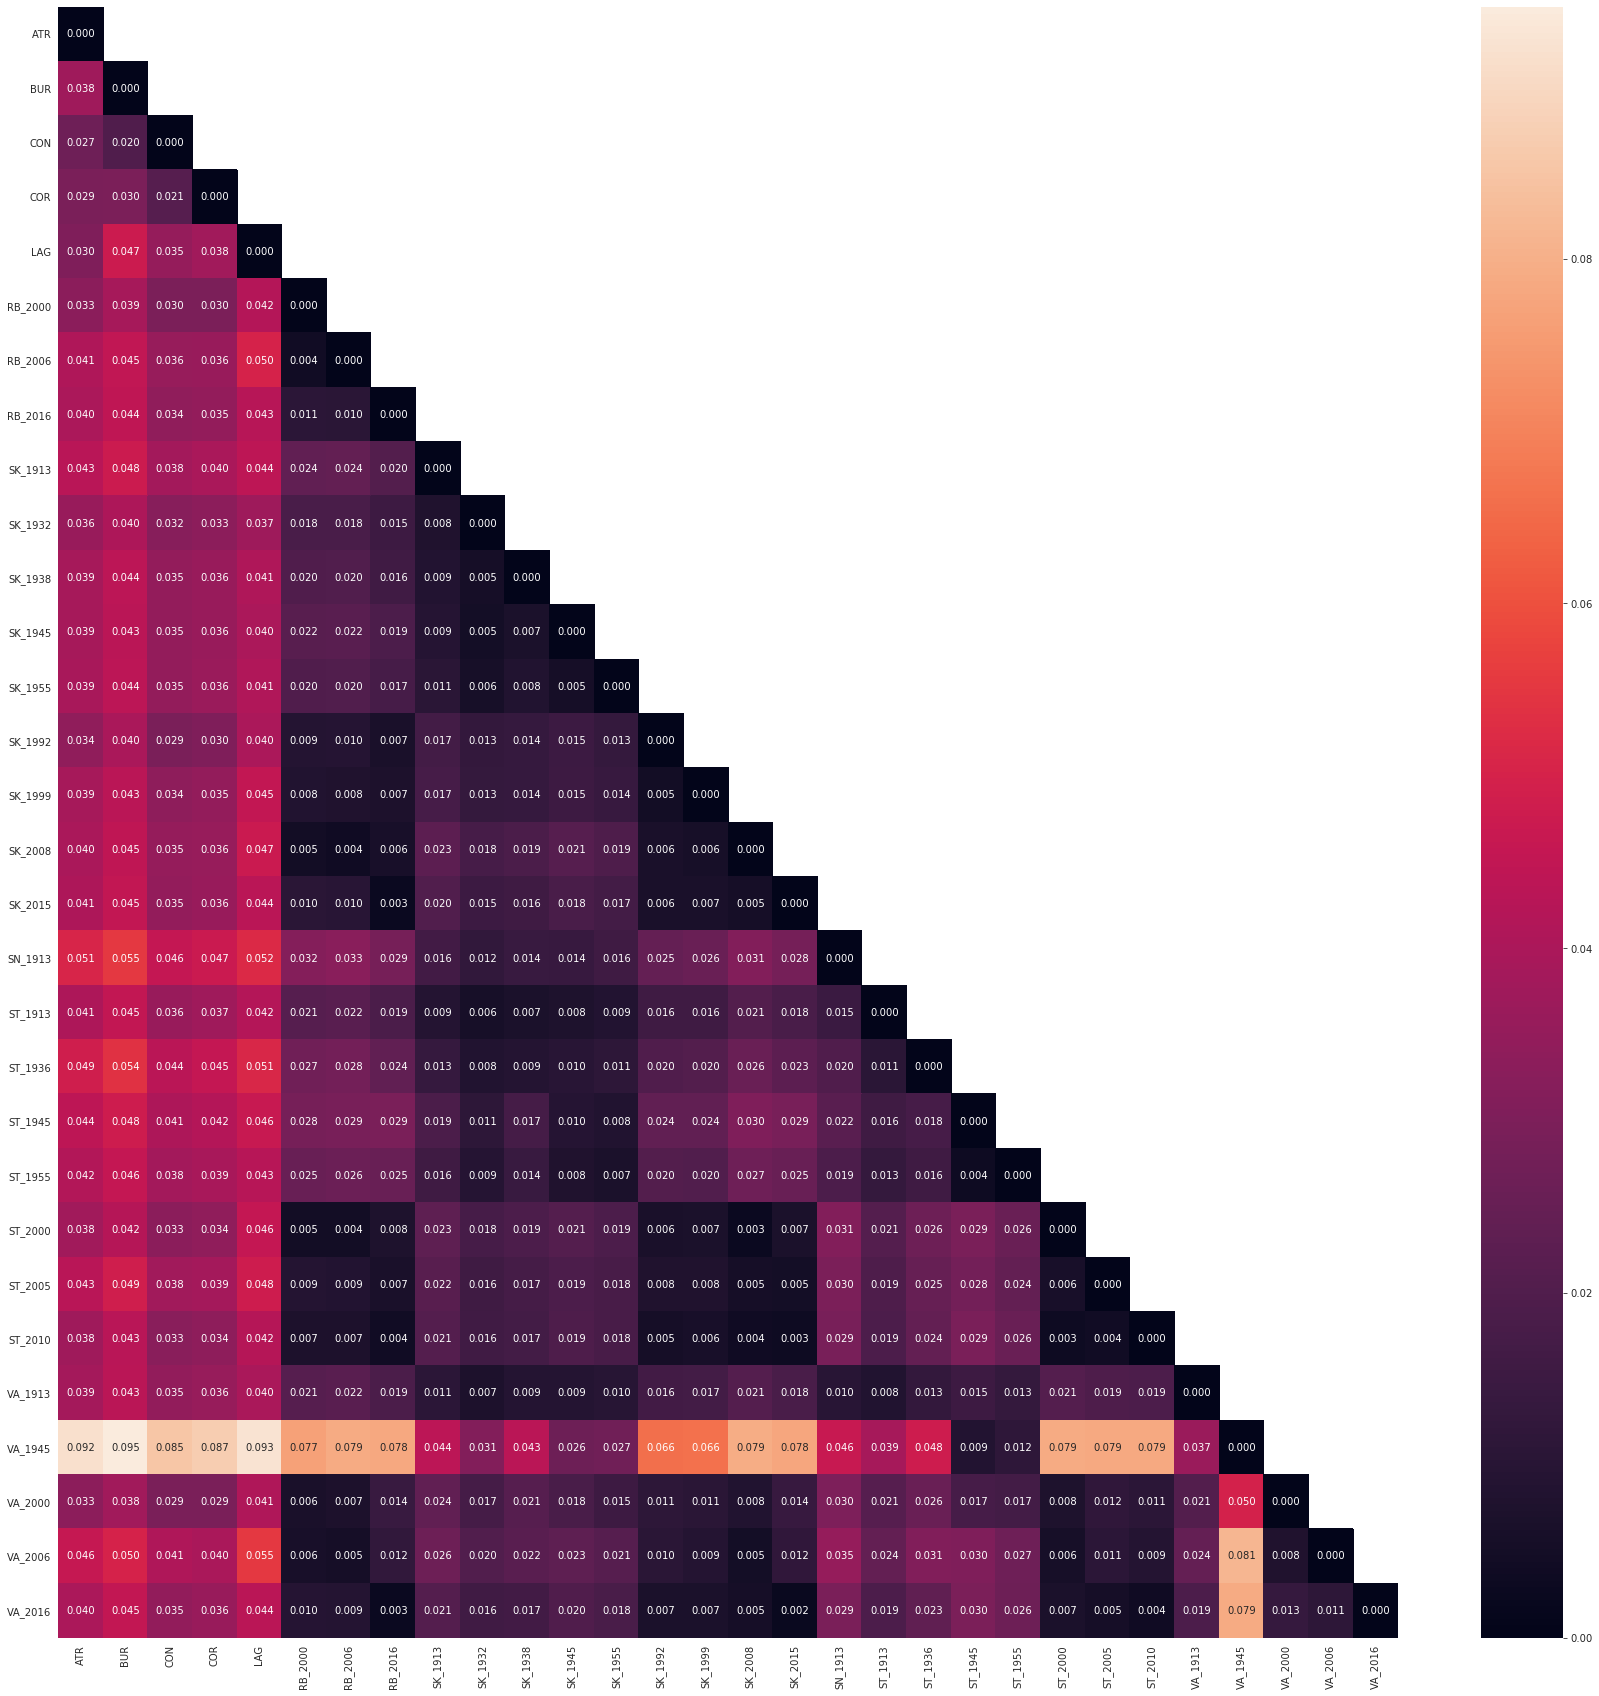

In [47]:
mask = np.zeros_like(dfW)
mask[np.triu_indices_from(dfW,1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,30))
    ax = sns.heatmap(dfW, annot=True, fmt=".3f", mask=mask)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#plt.rcParams['figure.figsize']=(20,20) #rescale figures
#sns.heatmap(dfW)

SFS

In [8]:
X=pd.read_csv('./out_1dsfs/SK_1913.sfs', sep=' ', header=None)

In [15]:
X.iloc[:,0:44]

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,3.918361e+07,857829.417734,134865.307608,52715.526118,36861.442505,29349.177568,24128.555889,20163.953465,16108.037867,14961.124421,...,731.624246,625.165092,673.41409,698.561448,504.156192,622.641287,689.104193,596.984708,809.846476,873.007237


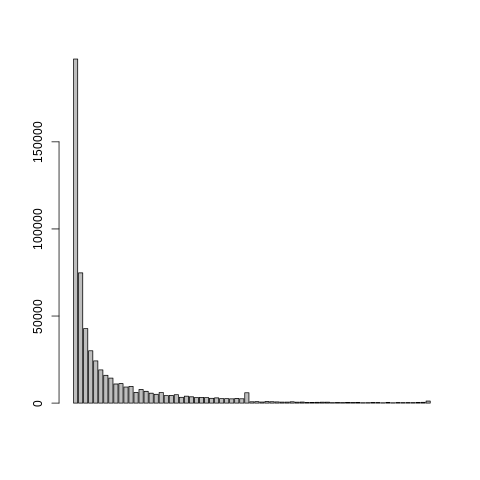

In [32]:
%%R
r = read.table('./out_1dsfs/VA_1913.sfs', sep=' ')
barplot(as.numeric(r[-c(1,2)]))